## SMOTE(Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [33]:
from sklearn.datasets import make_classification

Make_classification function from the sklearn.datasets module in Python to generate a synthetic dataset for a classification problem. This function is commonly used for creating artificial datasets for testing machine learning algorithms and models.

n_samples: This specifies the number of samples or data points you want to generate in your dataset. In your case, you've specified 1000 samples.

n_features: This parameter determines the number of features (or input variables) in each sample. You've set it to 2, which means each sample will have 2 features.

n_redundant: The number of redundant features added to the dataset. In your case, you've set it to 0, so there will be no redundant features.

n_clusters_per_class: This parameter indicates the number of clusters per class. You've set it to 1, meaning each class will have only one cluster.

weights: This is a list that specifies the relative proportions of the classes in the dataset. In your case, you've set it to [0.90], which means that 90% of the samples will belong to a single class.

random_state: This is used to seed the random number generator, ensuring reproducibility of results. You've set it to 1.

In [34]:
"""Generate a random n-class classification problem."""

# X is independent (inputs)
# Y is dependent (outputs)

"""
ML k algo k time n_redundant=0 samjh na hai...
Number of informative, redundant and repeated features 
must sum to less than the number of total features
"""

x, y = make_classification(n_samples=1000, 
                    n_features=2, 
                    n_redundant=0,
                    n_clusters_per_class=1, 
                    weights=[0.90], 
                    random_state=1)

In [35]:
x,y

(array([[ 1.53682958, -1.39869399],
        [ 1.55110839,  1.81032905],
        [ 1.29361936,  1.01094607],
        ...,
        [-0.55662536, -0.15983725],
        [ 1.00499902,  0.93628981],
        [ 1.46210987,  1.14497791]]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [36]:
import pandas as pd
df1 = pd.DataFrame(x, columns=["f1", "f2"])
df2 = pd.DataFrame(y, columns=["target"])
final_df = pd.concat([df1, df2], axis=1)
final_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


In [37]:
final_df["target"].value_counts()

0    894
1    106
Name: target, dtype: int64

<Axes: xlabel='f1', ylabel='f2'>

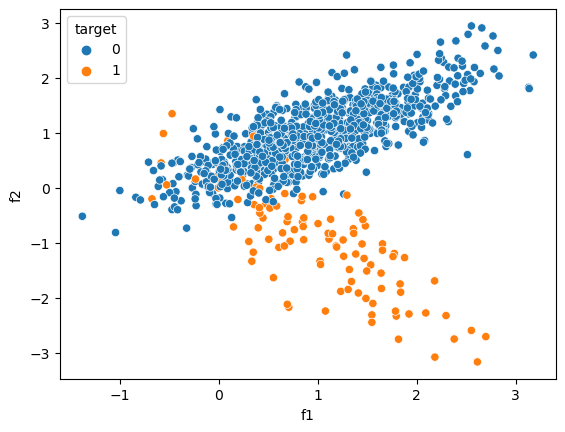

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=final_df["f1"], y=final_df["f2"], hue=final_df["target"])

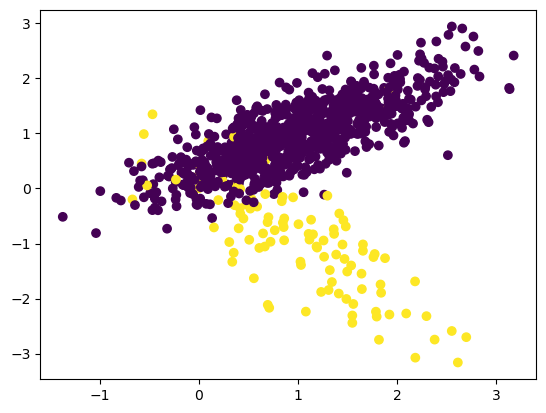

In [54]:
plt.scatter(final_df["f1"], final_df["f2"], c=final_df["target"])

In [57]:
from imblearn.over_sampling import SMOTE

In [62]:
# Transform data set
over_sample = SMOTE()
# Data Points and target feature dete hai
x, y = over_sample.fit_resample(final_df[["f1", "f2"]], final_df["target"])
x, y

(            f1        f2
 0     1.536830 -1.398694
 1     1.551108  1.810329
 2     1.293619  1.010946
 3     1.119889  1.632518
 4     1.042356  1.121529
 ...        ...       ...
 1783  1.434569 -1.585778
 1784  0.653087 -1.060060
 1785  0.504564 -0.340342
 1786  1.295389 -1.850685
 1787  0.359878 -0.304524
 
 [1788 rows x 2 columns],
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 1783    1
 1784    1
 1785    1
 1786    1
 1787    1
 Name: target, Length: 1788, dtype: int32)

In [68]:
len(y[y==0])

894

In [69]:
df1 = pd.DataFrame(x, columns=["f1", "f2"])
df2 = pd.DataFrame(y, columns=["target"])
final_df = pd.concat([df1, df2], axis=1)
final_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,1.434569,-1.585778,1
1784,0.653087,-1.060060,1
1785,0.504564,-0.340342,1
1786,1.295389,-1.850685,1


<Axes: xlabel='f1', ylabel='f2'>

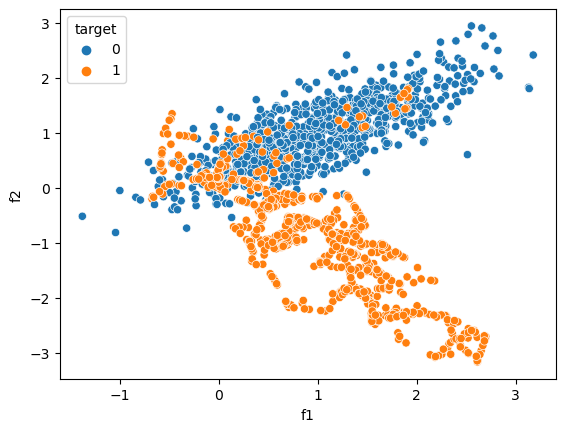

In [70]:
sns.scatterplot(x=final_df["f1"], y=final_df["f2"], hue=final_df["target"])